In [3]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [4]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    


In [5]:
# Now define our aliased drawing function (fixed)
def draw(canvas, x, y, v):
    canvas[(N - 1) - y, x] = min(canvas[(N - 1) - y, x], v)
    return canvas

def lineAA(canvas, x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    # init
    d = 2 * dy - dx
    y = y0
    two_v_dx = 0
    def get_aa_intensity(dist):
        return min(1.0, abs(dist))
    for x in range(x0, x1 + 1):

        denom = (2 * np.sqrt(dx**2 + dy**2))

        D = two_v_dx / denom
        D_up = (2 * dx - two_v_dx) / denom
        D_down = (2 * dx + two_v_dx) / denom
        canvas = draw(canvas, x, y, get_aa_intensity(D))
        canvas = draw(canvas, x, y+1, get_aa_intensity(D_up))
        canvas = draw(canvas, x, y-1, get_aa_intensity(D_down))

        if d < 0:
            # midpoint above line, choose E
            two_v_dx = d + dx        
            d = d + 2 * dy
        else:
            # midpoint below line, choose NE
            two_v_dx = d - dx
            d = d + 2 * (dy - dx)
            y = y + 1
    return canvas

In [6]:
# This time also without AA lines
def line(canvas, x0, y0, x1, y1):
    
    dx = x1 - x0
    dy = y1 - y0
    # init
    d = 2 * dy - dx
    y = y0
    for x in range(x0, x1 + 1):

        canvas = draw(canvas, x, y, 0)

        if d < 0:
            # midpoint above line, choose E
            d = d + 2 * dy
        else:
            # midpoint below line, choose NE
            d = d + 2 * (dy - dx)
            y = y + 1
    return canvas

In [25]:
# From the previous lecture
def draw_line(canvas, xs, xe, yy):
    for xx in range(xs, xe + 1):
        canvas[yy, xx] = 0
    return canvas

def fill(canvas):
    # Since we know that the circle extends only up R, we'll loop though there
    new_canvas = canvas.copy() # we'll make a copy because we don't want to redo the drawing above
    for y in range(0, N):
        # We'll have a counter that records even/odd
        xs = None
        is_odd = False
        for x in range(0, N):
            j = (N - 1) - (y)
            i = x
            if canvas[j, i] < 0.5 and canvas[j, i + 1] >= 0.5:
                if not is_odd:
                    xs = i
                else:
                    new_canvas = draw_line(new_canvas, xs, i, j)
                is_odd = not is_odd
    return new_canvas

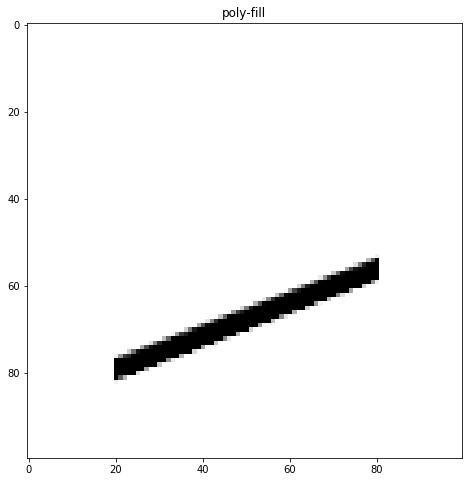

In [27]:
# Function to draw lines
def thick_line(canvas, x0, y0, x1, y1, thickness):
    # Draw rectangle
    canvas = lineAA(canvas, x0, y0-thickness, x1, y1-thickness)
    canvas = lineAA(canvas, x0, y0+thickness, x1, y1+thickness)    
    # For the vertical lines
    for j in range(-thickness, thickness+1):
        canvas = draw(canvas, x0, y0 + j, 0)
        canvas = draw(canvas, x1, y1 + j, 0)
    # Fill inside
    canvas = fill(canvas)
    return canvas

canvas = reset_canvas(N)
canvas = thick_line(canvas, 20, 20, 80, 43, 2)
show_canvas(canvas, "poly-fill")